In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive

 1707008
 1707026
 1707026.pdf
 1707026.zip
 1707059
 1e93121c-7ed4-4f3b-ac48-93cd4d673968.jpg
'2.1 math'
 3.1
 3.2
'Azhar Sir CT'
'Bandarban 2021'
 Classroom
'Colab Notebooks'
'Compiler Project'
'CSE 3212'
'CSE 3212 Compiler Design Lab Project Reports 15 June.zip'
'CSE 3212 Project Report'
 dataset
'Family Get-together'
'Fish n Chips'
'Getting started.pdf'
'Hum Assignments'
 IMG_20210101_101719.jpg
 IMG_20210101_170308.jpg
 Maruf
'MBA Thesis Works'
'My Drive'
 NID.pdf
'Rokib Sir Assignment'
'saaint martin tour'
'season 3'
 Shafi
 test
 WP
 yolov4
'পেদা টিং টিং'


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.5,
        horizontal_flip=True,
        brightness_range=[1.0,2.0],
        #validation_split=0.5
        )

train_generator = train_datagen.flow_from_directory(
        r'/mydrive/dataset/Final Dataset/training',
        target_size=(150,150),
        color_mode='rgb',
        batch_size=64,
        shuffle=True,
        class_mode='categorical',
        seed=42,
        #subset="training",
        #save_to_dir=r'C:\Users\Mahmudul Hasan\AppData\Local\Programs\Python\Python38\Scripts\training set\cars',
        #save_prefix='',
        #save_format='png'
        )

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(
        r'/mydrive/dataset/Final Dataset/validation',
        target_size=(150,150),
        color_mode='rgb',
        batch_size=64,
        class_mode='categorical',
        shuffle=True,
        seed=42,
        #subset="training",
        #save_to_dir=r'C:\Users\Mahmudul Hasan\AppData\Local\Programs\Python\Python38\Scripts\training set\cars',
        #save_prefix='',
        #save_format='png'
        )


train_generator.class_indices
train_generator.classes

Found 3388 images belonging to 5 classes.
Found 340 images belonging to 5 classes.


array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

base_model = InceptionResNetV2(include_top = False, # Leave out the last fully connected layer
weights = 'imagenet',
input_shape = (150,150, 3), # Shape of our images
pooling='max')



for layer in base_model.layers:
    layer.trainable = False


# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
#x = layers.Dropout(0.5)(x)

# Add a final softmax layer for classification
x = Dense(5, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

219062272/219055592 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', 
              #optimizer=RMSprop(lr=0.0001),
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
#Change the link to checkpoint folder
from keras.callbacks import CSVLogger
checkpoint_path = "/mydrive/dataset/Transfer Models/Inception_New/cp-{epoch:04d}.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1,
    save_weights_only=True,
    save_freq=2650)
    

csv_logger = CSVLogger("/mydrive/dataset/Transfer Models/Inception_New/model_history_log.csv", append=True)

In [ ]:
#Change the link to checkpoint folder
latest = tf.train.latest_checkpoint('/mydrive/dataset/Transfer Models/Inception_New')
#Run in case of interuption 
model.load_weights(latest)
latest

'/mydrive/dataset/Transfer Models/Inception_New/cp-0300.ckpt'

In [ ]:
history=model.fit(train_generator,
                    epochs=200,
                    validation_data=valid_generator,
                    callbacks=[cp_callback,csv_logger]
                    )

Epoch 1/200
53/53 [==============================] - 1253s 23s/step - loss: 0.4351 - accuracy: 0.8208 - val_loss: 0.5333 - val_accuracy: 0.7706
Epoch 2/200
53/53 [==============================] - 40s 758ms/step - loss: 0.4240 - accuracy: 0.8247 - val_loss: 0.5241 - val_accuracy: 0.7794
Epoch 3/200
53/53 [==============================] - 39s 728ms/step - loss: 0.4170 - accuracy: 0.8279 - val_loss: 0.5052 - val_accuracy: 0.7971
Epoch 4/200
53/53 [==============================] - 40s 755ms/step - loss: 0.4322 - accuracy: 0.8079 - val_loss: 0.5627 - val_accuracy: 0.7647
Epoch 5/200
53/53 [==============================] - 38s 726ms/step - loss: 0.4363 - accuracy: 0.8117 - val_loss: 0.5175 - val_accuracy: 0.7647
Epoch 6/200
53/53 [==============================] - 39s 738ms/step - loss: 0.4362 - accuracy: 0.8197 - val_loss: 0.5125 - val_accuracy: 0.7676
Epoch 7/200
53/53 [==============================] - 40s 742ms/step - loss: 0.4322 - accuracy: 0.8155 - val_loss: 0.5034 - val_accuracy:

In [ ]:
model.save('/mydrive/dataset/Transfer Models/Inception_New/Inception_New.model')

INFO:tensorflow:Assets written to: /mydrive/dataset/Transfer Models/Inception_New/Inception_New.model/assets


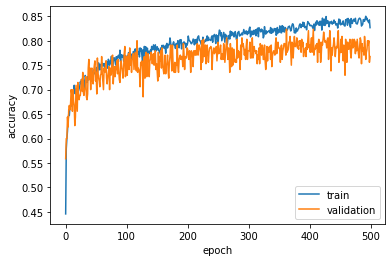

In [ ]:
csv = '/mydrive/dataset/Transfer Models/Inception_New/model_history_log.csv'
x = pd.read_csv(csv, usecols=[0])
y = pd.read_csv(csv, usecols=[1,3])
plt.plot(x, y)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc='lower right')
abc='A v E InceptionResNetV2'
plt.savefig(f'/mydrive/dataset/SI TL/Inception_New/{abc}.png',bbox_inches="tight",dpi=520)
plt.show()

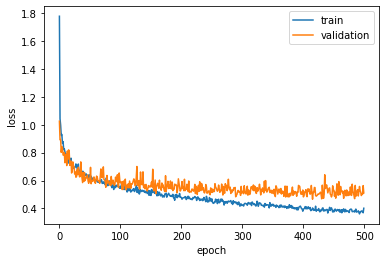

In [ ]:
x = pd.read_csv(csv, usecols=[0])
y = pd.read_csv(csv, usecols=[2,4])
plt.plot(x, y)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc='upper right')
abc='L v E InceptionResNetV2'
plt.savefig(f'/mydrive/dataset/SI TL/Inception_New/{abc}.png',bbox_inches="tight",dpi=520)
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        r'/mydrive/dataset/Final Dataset/testing',
        target_size=(150,150),
        color_mode='rgb',
        batch_size=64,
        class_mode='categorical',
        shuffle=False,
        seed=42)

test_imgs, test_labels = next(test_generator)

Found 320 images belonging to 5 classes.


In [ ]:
#model = tf.keras.models.load_model('/mydrive/dataset/Transfer Models/InceptionResNetV2/InceptionResNetV2.model')
#tf.keras.models.load_model

In [ ]:
#model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
predictions = model.predict(x=test_generator, verbose=0)
np.round(predictions)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
import sklearn    
from sklearn.metrics import confusion_matrix

y_true=test_generator.classes
y_pred=np.argmax(predictions, axis=-1)

cm = confusion_matrix(y_true, y_pred)

Confusion matrix, without normalization
[[59  0  5  0  0]
 [ 0 52  1 11  0]
 [ 2  0 52 10  0]
 [ 0  3 12 49  0]
 [ 0  4  0  1 59]]


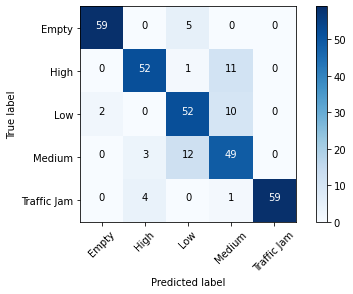

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot_labels = ['Empty', 'High', 'Low', 'Medium', 'Traffic Jam']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)
abc='Confusion Matrix InceptionResNetV2'
plt.savefig(f'/mydrive/dataset/SI TL/Inception_New/{abc}.png',bbox_inches="tight",dpi=520)
#plt.savefig(f'/mydrive/dataset/Transfer_Learning/confusion(TL)/{abc}.png',bbox_inches="tight",dpi=520)

In [ ]:
from sklearn.metrics import accuracy_score

print('Prediction Accuracy:', "{:.2f}".format(100*accuracy_score(y_true, y_pred))+"%")

Prediction Accuracy: 84.69%


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install scikit-plot
import scikitplot as skplt
from sklearn.metrics import classification_report

class_labels = list(test_generator.class_indices.keys())
report = classification_report(
    y_true,
    y_pred,
    target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       Empty       0.97      0.92      0.94        64
        High       0.88      0.81      0.85        64
         Low       0.74      0.81      0.78        64
      Medium       0.69      0.77      0.73        64
 Traffic Jam       1.00      0.92      0.96        64

    accuracy                           0.85       320
   macro avg       0.86      0.85      0.85       320
weighted avg       0.86      0.85      0.85       320



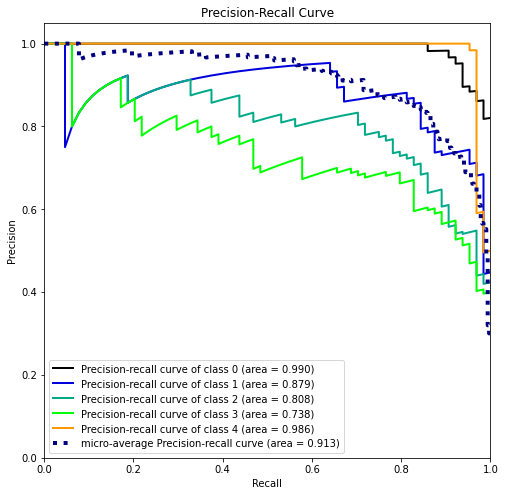

In [ ]:
skplt.metrics.plot_precision_recall(
    y_true,
    predictions,
    figsize=(8,8))
abc='Precision Recall InceptionResNetV2'
plt.savefig(f'/mydrive/dataset/SI TL/Inception_New/{abc}.png',bbox_inches="tight",dpi=520)

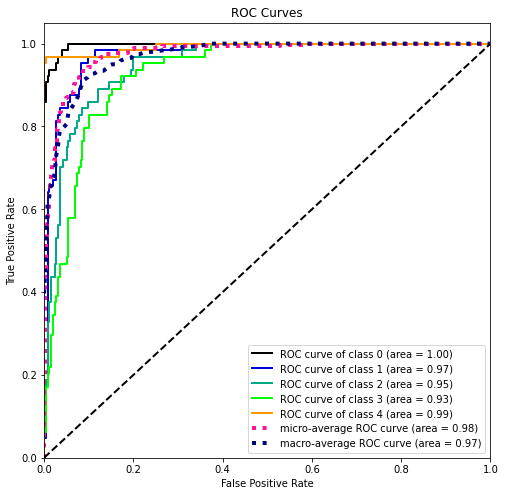

In [ ]:
skplt.metrics.plot_roc(
    y_true,
    predictions,
    figsize=(8,8))
abc='ROC InceptionResNetV2'
plt.savefig(f'/mydrive/dataset/SI TL/Inception_New/{abc}.png',bbox_inches="tight",dpi=520)

In [ ]:
from tensorflow.keras.utils import to_categorical

val= to_categorical(test_generator.classes)
print(val)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [ ]:
def top_n_accuracy(preds, truths, n):
    best_n = np.argsort(preds, axis=-1)[:,-n:]
    ts = np.argmax(truths, axis=1)
    successes = 0
    for i in range(ts.shape[0]):
      if ts[i] in best_n[i,:]:
        successes += 1
    return float(successes)/ts.shape[0]

print('Top 2 Accuracy:', "{:.2f}".format(100*top_n_accuracy(preds=predictions, truths=val, n=2))+"%")

Top 2 Accuracy: 97.50%
